# Kaggle INTRO
All the code here is just from [text](https://www.kaggle.com/code/iogbonna/introduction-to-graph-neural-network-with-pytorch)

In [ ]:
# Import Packages
import os
import torch
print("Pytorch Version:", torch.__version__)

%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

Pytorch Version: 2.3.1


In [18]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=44), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

In [19]:
# Import the PYG Dataset Example
from torch_geometric.datasets import KarateClub
dataset = KarateClub()

print('Dataset properties')
print('==============================================================')
print(f'Dataset: {dataset}') #This prints the name of the dataset
print(f'Number of graphs in the dataset: {len(dataset)}')
print(f'Number of features: {dataset.num_features}') #Number of features each node in the dataset has
print(f'Number of classes: {dataset.num_classes}') #Number of classes that a node can be classified into

#Since we have one graph in the dataset, we will select the graph and explore it's properties
data = dataset[0]
print('Graph properties')
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}') #Number of nodes in the graph
print(f'Number of edges: {data.num_edges}') #Number of edges in the graph
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}') # Average number of nodes in the graph
print(f'Contains isolated nodes: {data.has_isolated_nodes()}') #Does the graph contains nodes that are not connected
print(f'Contains self-loops: {data.has_self_loops()}') #Does the graph contains nodes that are linked to themselves
print(f'Is undirected: {data.is_undirected()}') #Is the graph an undirected graph

Dataset properties
Dataset: KarateClub()
Number of graphs in the dataset: 1
Number of features: 34
Number of classes: 4
Graph properties
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


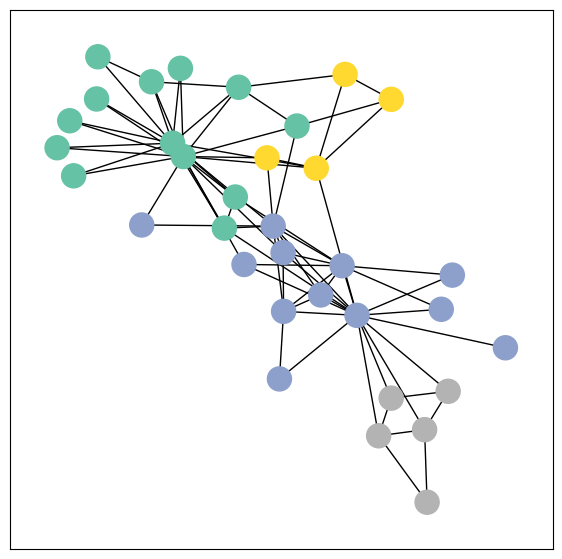

In [24]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

### Implementation of GNN

We will use simple, 3 layer, Graph Convolutional Network (GCN) layer. This corresponds to a 3-hop neighborhood of information. Each layer will be programmed to reduce the dimensionality by 2. 

In [25]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [27]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()  #Initialize the CrossEntropyLoss function.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Initialize the Adam optimizer.
it_num = 1000
def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(it_num):
    loss, h = train(data)
    print(f'Epoch: {epoch}, Loss: {loss}')

Epoch: 0, Loss: 1.414404273033142
Epoch: 1, Loss: 1.4079036712646484
Epoch: 2, Loss: 1.40178644657135
Epoch: 3, Loss: 1.3959276676177979
Epoch: 4, Loss: 1.3902204036712646
Epoch: 5, Loss: 1.3845514059066772
Epoch: 6, Loss: 1.3788156509399414
Epoch: 7, Loss: 1.372924566268921
Epoch: 8, Loss: 1.3668041229248047
Epoch: 9, Loss: 1.3603922128677368
Epoch: 10, Loss: 1.3536322116851807
Epoch: 11, Loss: 1.346463680267334
Epoch: 12, Loss: 1.3388220071792603
Epoch: 13, Loss: 1.3306517601013184
Epoch: 14, Loss: 1.321907877922058
Epoch: 15, Loss: 1.312545895576477
Epoch: 16, Loss: 1.3025131225585938
Epoch: 17, Loss: 1.291739821434021
Epoch: 18, Loss: 1.2801498174667358
Epoch: 19, Loss: 1.267681360244751
Epoch: 20, Loss: 1.2542929649353027
Epoch: 21, Loss: 1.2399559020996094
Epoch: 22, Loss: 1.2246456146240234
Epoch: 23, Loss: 1.2083479166030884
Epoch: 24, Loss: 1.1910829544067383
Epoch: 25, Loss: 1.1729077100753784
Epoch: 26, Loss: 1.1538856029510498
Epoch: 27, Loss: 1.1340937614440918
Epoch: 28, 